In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import PCA

In [2]:
data=pd.read_csv("Salaries.csv")
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
data.shape

(148654, 13)

In [4]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [5]:
data.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [7]:
del data['Notes']
del data['Status']

In [8]:
data.drop('Id',axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BasePay,148045.0,66325.448841,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00


In [9]:
data.describe(include=['O'])

,EmployeeName,JobTitle,Agency
count,148654,148654,148654
unique,110811,2159,1
top,Kevin Lee,Transit Operator,San Francisco
freq,13,7036,148654


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002475FD58B08>,
      dtype=object)

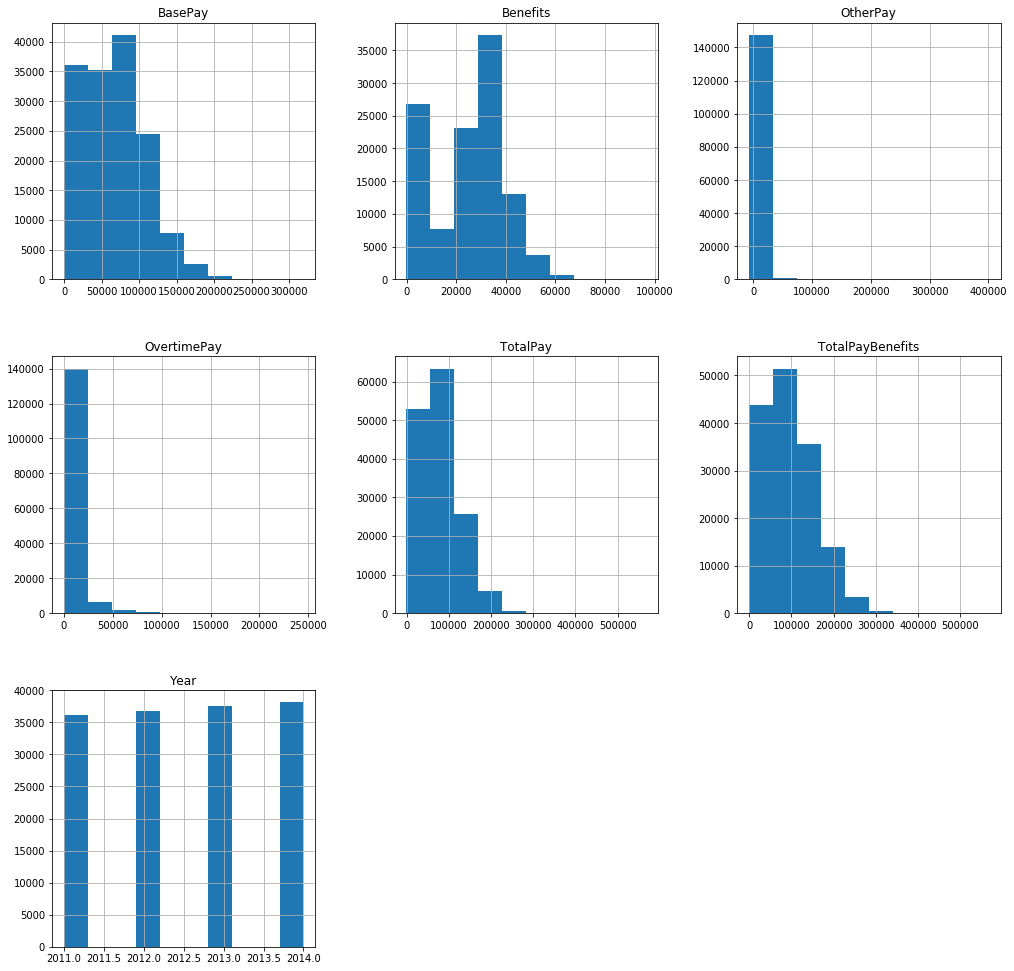

In [10]:
#plot only the features that are types float64 or int64
df=data.drop('Id',axis=1)
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[17,17])

In [12]:
features=[f  for f in df.columns if(df[f].dtypes=="float64")|(df[f].dtypes=="int64")]
features

['BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year']

In [13]:
num_features=df.loc[:,features]

In [14]:
mean_of_TotalPay=num_features["TotalPay"].mean()
print('mean_of_TotalPay:',mean_of_TotalPay)
mean_of_TotalPayBenefits=num_features["TotalPayBenefits"].mean()
print('mean_of_TotalPayBenefits:',mean_of_TotalPayBenefits)
median_of_TotalPay=num_features["TotalPay"].median()
print('median_of_TotalPay:',median_of_TotalPay)
median_of_TotalPayBenefits=num_features["TotalPayBenefits"].median()
print('median_of_TotalPayBenefits:',median_of_TotalPayBenefits)
mode_of_TotalPay=num_features["TotalPay"].mode()
print('mode_of_TotalPay:',mode_of_TotalPay)
mode_of_TotalPayBenefits=num_features["TotalPayBenefits"].mode()
print('mode_of_TotalPayBenefits:',mode_of_TotalPayBenefits)

mean_of_TotalPay: 74768.321971703
mean_of_TotalPayBenefits: 93692.55481056834
median_of_TotalPay: 71426.60999999999
median_of_TotalPayBenefits: 92404.09
mode_of_TotalPay: 0    0.0
dtype: float64
mode_of_TotalPayBenefits: 0    7959.18
dtype: float64


In [15]:
df['JobTitle'].value_counts()

Transit Operator                                    7036
Special Nurse                                       4389
Registered Nurse                                    3736
Public Svc Aide-Public Works                        2518
Police Officer 3                                    2421
                                                    ... 
CHIEF TELEPHONE OPERATOR                               1
FARMER                                                 1
ORTHOPEDIC TECHNICIAN I                                1
BOARD SECRETARY - MUNICIPAL TRANSPORTATION AGENC       1
Undersheriff (SFERS)                                   1
Name: JobTitle, Length: 2159, dtype: int64

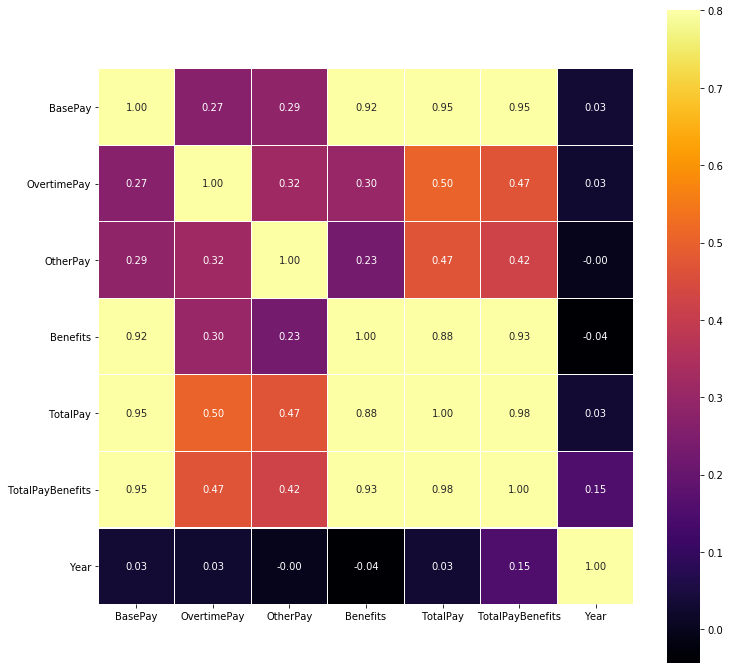

In [16]:
# check out correlations among numeric features
colormap = plt.cm.inferno
cor = num_features.corr()
plt.figure(figsize=(12,12))
# Draw it using heatmap
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',
            square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

In [23]:
df[df['BasePay'].isnull()==True]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
81391,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013,San Francisco
84506,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013,San Francisco
84960,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013,San Francisco
90525,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013,San Francisco
90786,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,San Francisco
...,...,...,...,...,...,...,...,...,...,...
110530,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148646,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148650,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [33]:
counts=df['JobTitle'].value_counts(dropna=False)
labels=df['JobTitle'].unique()
#counts.plot.pie(labels=labels,autopct='1.1f%%')
labels

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [44]:
data_group=data.groupby("JobTitle")
data.JobTitle.nunique()

2159

In [49]:
data.groupby("JobTitle").size()

JobTitle
ACCOUNT CLERK                                      83
ACCOUNTANT                                          5
ACCOUNTANT INTERN                                  48
ACPO,JuvP, Juv Prob (SFERS)                         1
ACUPUNCTURIST                                       1
                                                 ... 
X-RAY LABORATORY AIDE                              26
X-Ray Laboratory Aide                             100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1
Youth Comm Advisor                                  4
ZOO CURATOR                                         1
Length: 2159, dtype: int64

In [52]:
data_group.count()

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
JobTitle,,,,,,,,,,
ACCOUNT CLERK,83,83,83,83,83,0,83,83,83,83
ACCOUNTANT,5,5,5,5,5,0,5,5,5,5
ACCOUNTANT INTERN,48,48,48,48,48,0,48,48,48,48
"ACPO,JuvP, Juv Prob (SFERS)",1,1,1,1,1,1,1,1,1,1
ACUPUNCTURIST,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,26,26,26,26,26,0,26,26,26,26
X-Ray Laboratory Aide,100,100,100,100,100,100,100,100,100,100
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1,1,1,1,1,0,1,1,1,1


In [54]:
df_columns=data_group[['BasePay','TotalPay','TotalPayBenefits']]
df_columns.mean()

,BasePay,TotalPay,TotalPayBenefits
JobTitle,,,
ACCOUNT CLERK,43300.806506,44035.664337,44035.664337
ACCOUNTANT,46643.172000,47429.268000,47429.268000
ACCOUNTANT INTERN,28732.663958,29031.742917,29031.742917
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,62290.780000,80266.370000
ACUPUNCTURIST,66374.400000,67594.400000,67594.400000
...,...,...,...
X-RAY LABORATORY AIDE,47664.773077,52705.880385,52705.880385
X-Ray Laboratory Aide,46086.387100,50823.942700,69521.123200
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",52609.910000,53632.870000,53632.870000


In [72]:
pd.set_option('display.max_rows',None)
data_group2=data.groupby(["JobTitle","Year"])
df_columns=data_group2[['BasePay','TotalPay','TotalPayBenefits']]
df_columns.mean()

,,BasePay,TotalPay,TotalPayBenefits
JobTitle,Year,,,
ACCOUNT CLERK,2011,43300.806506,44035.664337,44035.664337
ACCOUNTANT,2011,46643.172000,47429.268000,47429.268000
ACCOUNTANT INTERN,2011,28732.663958,29031.742917,29031.742917
"ACPO,JuvP, Juv Prob (SFERS)",2014,62290.780000,62290.780000,80266.370000
ACUPUNCTURIST,2011,66374.400000,67594.400000,67594.400000
ADMINISTRATIVE ANALYST,2011,63435.628602,63954.867527,63954.867527
ADMINISTRATIVE ANALYST II,2011,59373.710000,61497.035000,61497.035000
ADMINISTRATIVE ANALYST III,2011,92698.515000,92698.515000,92698.515000
ADMINISTRATIVE ENGINEER,2011,120913.161000,127961.430000,127961.430000


In [70]:
data[(data["JobTitle"]=="ACCOUNT CLERK") & (data["Year"]==2011)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.20,0.00,0.00,NaN,60838.20,60838.20,2011,San Francisco
20867,20868,BERNADETTE RAMOS,ACCOUNT CLERK,49777.81,10753.06,0.00,NaN,60530.87,60530.87,2011,San Francisco
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.28,5406.34,1814.58,NaN,58527.20,58527.20,2011,San Francisco
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.15,3811.68,1084.76,NaN,54674.59,54674.59,2011,San Francisco
24132,24133,LI-XIN CAI,ACCOUNT CLERK,49777.80,1390.45,624.00,NaN,51792.25,51792.25,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
31245,31246,ALISHA WILLIS,ACCOUNT CLERK,11247.02,0.00,0.00,NaN,11247.02,11247.02,2011,San Francisco
32035,32036,BARBARA BLOUNT,ACCOUNT CLERK,8681.58,69.82,0.00,NaN,8751.40,8751.40,2011,San Francisco
34974,34975,LIEN LUM,ACCOUNT CLERK,1630.00,0.00,0.00,NaN,1630.00,1630.00,2011,San Francisco
34975,34976,RACHEL LAU,ACCOUNT CLERK,1630.00,0.00,0.00,NaN,1630.00,1630.00,2011,San Francisco
